<a href="https://colab.research.google.com/github/Astro-Beam/ASTRO/blob/main/Neural%20Networks/Autoencoder%20Components/Training%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset

#Steps for generating the signal

We firstly create a function that generates a random wave, composed of a sin and a cos function.

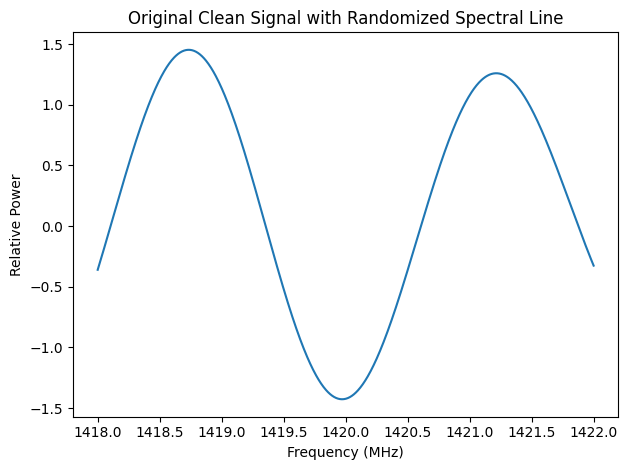

In [ ]:
def generate_signal(n_samples):
    freq_range = np.linspace(1418, 1422, n_samples)

    # Add randomness to the background signal generation
    random_factor1 = np.random.uniform(0.05, 0.5)
    random_factor2 = np.random.uniform(0.05, 0.5)
    signal = (np.sin(2 * np.pi * random_factor1 * freq_range) + random_factor2 * np.sin(2 * np.pi * random_factor2 * freq_range))

    return signal

# Generate the signal
n_samples = 1000
freq_range = np.linspace(1418, 1422, n_samples)
signal = generate_signal(n_samples)

# Plot the clean signal
plt.plot(freq_range, signal)
plt.title("Original Clean Signal with Randomized Spectral Line")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")

# Show the plots
plt.tight_layout()
plt.show()

We then add the spectral line at 1420 MHz.

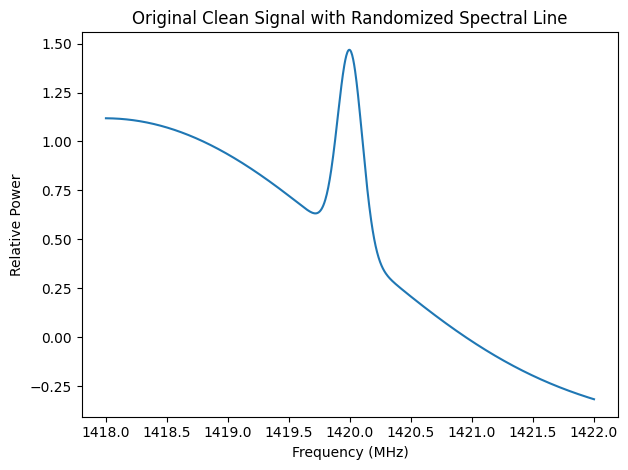

In [ ]:
def generate_signal(n_samples):
    freq_range = np.linspace(1418, 1422, n_samples)

    # Add randomness to the background signal generation
    random_factor1 = np.random.uniform(0.05, 0.5)
    random_factor2 = np.random.uniform(0.05, 0.5)
    signal = (np.sin(2 * np.pi * random_factor1 * freq_range) + random_factor2 * np.sin(2 * np.pi * random_factor2 * freq_range))

    # Add the spectral line at 1420 MHz
    spectral_line_shape = np.exp(-0.5 * ((freq_range - 1420) / 0.1)**2)
    signal += spectral_line_shape

    return signal

# Generate the signal
n_samples = 1000
freq_range = np.linspace(1418, 1422, n_samples)
signal = generate_signal(n_samples)

# Plot the clean signal
plt.plot(freq_range, signal)
plt.title("Original Clean Signal with Randomized Spectral Line")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")

# Show the plots
plt.tight_layout()
plt.show()

To introduce more variance to the signal, we make it so that the spectral line is not found at a specific frequency, but somewhere in the range of 1419.9 to 1420.1 MHz. We have to note that the range is **arbitrary** and has no scientific significance.

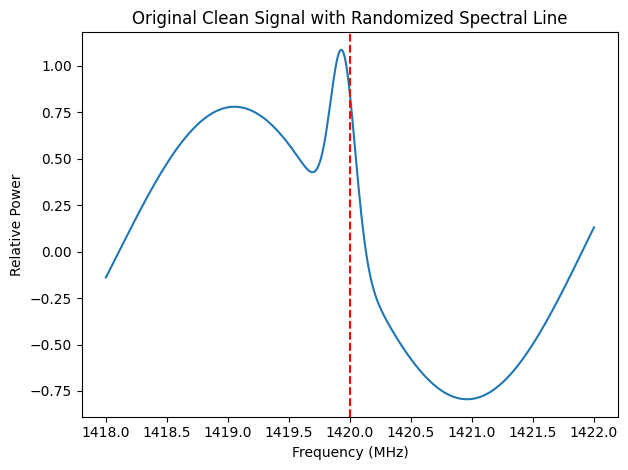

In [ ]:
def generate_signal(n_samples):
    freq_range = np.linspace(1418, 1422, n_samples)

    # Add randomness to the background signal generation
    random_factor1 = np.random.uniform(0.05, 0.5)
    random_factor2 = np.random.uniform(0.05, 0.5)
    signal = (np.sin(2 * np.pi * random_factor1 * freq_range) + random_factor2 * np.sin(2 * np.pi * random_factor2 * freq_range))

    # Randomize the spectral line position between 1419.9 and 1420.1 MHz
    spectral_line_center = np.random.uniform(1419.9, 1420.1)

    # Add the spectral line at the random frequency
    spectral_line_shape = np.exp(-0.5 * ((freq_range - spectral_line_center) / 0.1)**2)
    signal += spectral_line_shape

    return signal

# Generate the signal
n_samples = 1000
freq_range = np.linspace(1418, 1422, n_samples)
signal = generate_signal(n_samples)

# Plot the clean signal
plt.plot(freq_range, signal)
plt.title("Original Clean Signal with Randomized Spectral Line")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")

#Plot a vertical line at 1420 MHz to show variance
plt.axvline(x=1420, color='r', linestyle='--')

# Show the plots
plt.tight_layout()
plt.show()

For even more variance, we make it so that the spectral line has a random height, by introducing an "amplitude" factor. We have to note that the amplitude values are **arbitrary** and have no scientific significance.

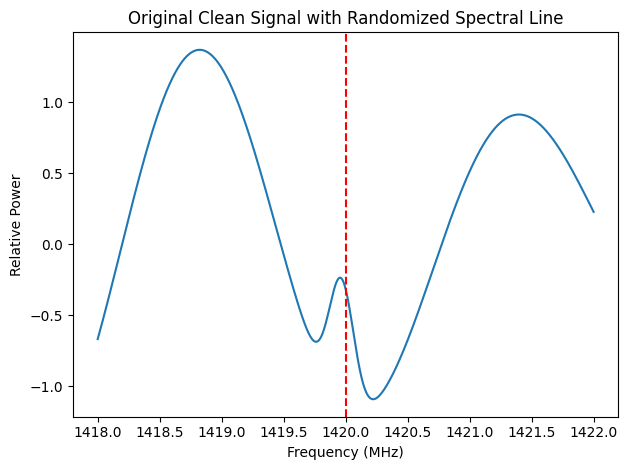

In [ ]:
def generate_signal(n_samples):
    freq_range = np.linspace(1418, 1422, n_samples)

    # Add randomness to the background signal generation
    random_factor1 = np.random.uniform(0.05, 0.5)
    random_factor2 = np.random.uniform(0.05, 0.5)
    signal = (np.sin(2 * np.pi * random_factor1 * freq_range) + random_factor2 * np.sin(2 * np.pi * random_factor2 * freq_range))

    # Randomize the spectral line position between 1419.9 and 1420.1 MHz
    spectral_line_center = np.random.uniform(1419.9, 1420.1)

    #Randomize the spectral line height
    spectral_line_amplitude = np.random.uniform(0.7, 1.2)

    # Add the spectral line at the random frequency
    spectral_line_shape = spectral_line_amplitude * np.exp(-0.5 * ((freq_range - spectral_line_center) / 0.1)**2)
    signal += spectral_line_shape

    return signal

# Generate the signal
n_samples = 1000
freq_range = np.linspace(1418, 1422, n_samples)
signal = generate_signal(n_samples)

# Plot the clean signal
plt.plot(freq_range, signal)
plt.title("Original Clean Signal with Randomized Spectral Line")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")

#Plot a vertical line at 1420 MHz to show variance
plt.axvline(x=1420, color='r', linestyle='--')

# Show the plots
plt.tight_layout()
plt.show()

We then add gaussian noise of random intensity to simulate a real-world scenario. The values for the noise are, once again, arbitrary.

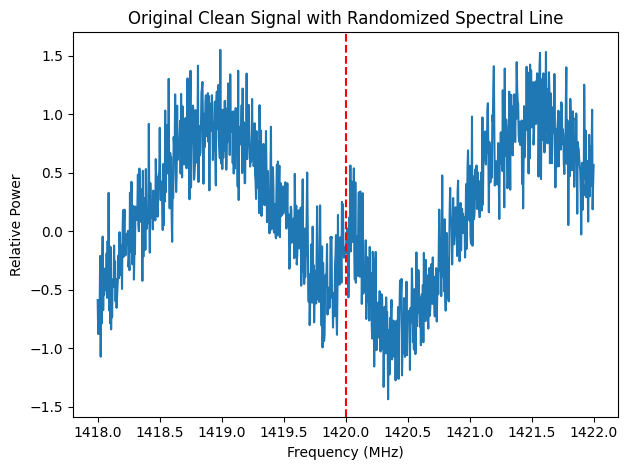

In [ ]:
def generate_signal(n_samples):
    freq_range = np.linspace(1418, 1422, n_samples)

    # Add randomness to the background signal generation
    random_factor1 = np.random.uniform(0.05, 0.5)
    random_factor2 = np.random.uniform(0.05, 0.5)
    signal = (np.sin(2 * np.pi * random_factor1 * freq_range) + random_factor2 * np.sin(2 * np.pi * random_factor2 * freq_range))

    # Randomize the spectral line position between 1419.9 and 1420.1 MHz
    spectral_line_center = np.random.uniform(1419.9, 1420.1)

    #Randomize the spectral line height
    spectral_line_amplitude = np.random.uniform(0.7, 1.2)

    # Add the spectral line at the random frequency
    spectral_line_shape = spectral_line_amplitude * np.exp(-0.5 * ((freq_range - spectral_line_center) / 0.1)**2)
    signal += spectral_line_shape

    # Add random gaussian noise with μ = 0, random σ
    noise_amplitude = np.random.uniform(0.1, 0.3)
    noise = np.random.normal(0, noise_amplitude, len(signal))
    signal += noise

    return signal

# Generate the signal
n_samples = 1000
freq_range = np.linspace(1418, 1422, n_samples)
signal = generate_signal(n_samples)

# Plot the clean signal
plt.plot(freq_range, signal)
plt.title("Original Clean Signal with Randomized Spectral Line")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")

#Plot a vertical line at 1420 MHz to show variance
plt.axvline(x=1420, color='r', linestyle='--')

# Show the plots
plt.tight_layout()
plt.show()

We normalize the signal for easier handling by the autoencoder.

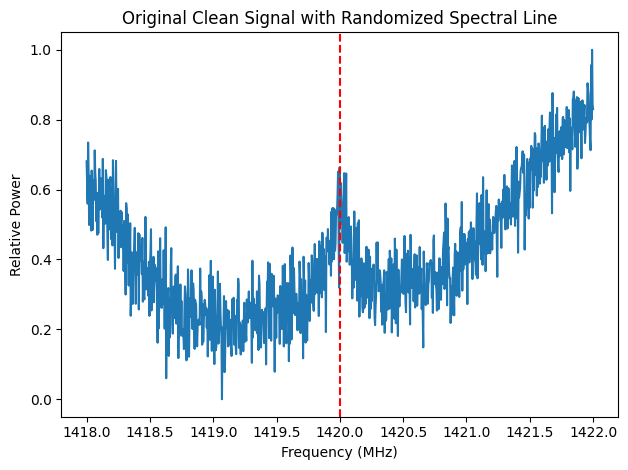

In [8]:
def generate_signal(n_samples):
    freq_range = np.linspace(1418, 1422, n_samples)

    # Add randomness to the background signal generation
    random_factor1 = np.random.uniform(0.05, 0.5)
    random_factor2 = np.random.uniform(0.05, 0.5)
    signal = (np.sin(2 * np.pi * random_factor1 * freq_range) + random_factor2 * np.sin(2 * np.pi * random_factor2 * freq_range))

    # Randomize the spectral line position between 1419.9 and 1420.1 MHz
    spectral_line_center = np.random.uniform(1419.9, 1420.1)

    #Randomize the spectral line height
    spectral_line_amplitude = np.random.uniform(0.7, 1.2)

    # Add the spectral line at the random frequency
    spectral_line_shape = spectral_line_amplitude * np.exp(-0.5 * ((freq_range - spectral_line_center) / 0.1)**2)
    signal += spectral_line_shape

    # Add random gaussian noise with μ = 0, random σ
    noise_amplitude = np.random.uniform(0.1, 0.3)
    noise = np.random.normal(0, noise_amplitude, len(signal))
    signal += noise

    # Normalize the signal to have a maximum value of 1
    signal += np.abs(np.min(signal))
    signal /= np.max(np.abs(signal))

    return signal

# Generate the signal
n_samples = 1000
freq_range = np.linspace(1418, 1422, n_samples)
signal = generate_signal(n_samples)

# Plot the clean signal
plt.plot(freq_range, signal)
plt.title("Original Clean Signal with Randomized Spectral Line")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")

#Plot a vertical line at 1420 MHz to show variance
plt.axvline(x=1420, color='r', linestyle='--')

# Show the plots
plt.tight_layout()
plt.show()

#Final signal-generating functions

Signal WITHOUT spectral line.

In [ ]:
def generate_background_signal(n_samples):
    freq_range = np.linspace(1418, 1422, n_samples)

    # Random background signal generation
    random_factor1 = np.random.uniform(0.05, 0.5)
    random_factor2 = np.random.uniform(0.05, 0.5)
    signal = (np.sin(2 * np.pi * random_factor1 * freq_range) + random_factor2 * np.sin(2 * np.pi * random_factor2 * freq_range))

    # Add random gaussian noise
    noise_amplitude = np.random.uniform(0.1, 0.3)
    noise = np.random.normal(0, noise_amplitude, len(signal))
    signal += noise

    # Normalize the signal
    signal += np.abs(np.min(signal))
    signal /= np.max(np.abs(signal))

    return signal

Signal WITH spectral line.

In [ ]:
def generate_signal(n_samples):
    freq_range = np.linspace(1418, 1422, n_samples)

    # Random background signal generation
    random_factor1 = np.random.uniform(0.05, 0.5)
    random_factor2 = np.random.uniform(0.05, 0.5)
    signal = (np.sin(2 * np.pi * random_factor1 * freq_range) + random_factor2 * np.sin(2 * np.pi * random_factor2 * freq_range))

    # Spectral line generation
    spectral_line_center = np.random.uniform(1419.9, 1420.1)
    spectral_line_amplitude = np.random.uniform(0.7, 1.2)
    spectral_line_shape = spectral_line_amplitude * np.exp(-0.5 * ((freq_range - spectral_line_center) / 0.1)**2)
    signal += spectral_line_shape

    # Add random gaussian noise
    noise_amplitude = np.random.uniform(0.1, 0.3)
    noise = np.random.normal(0, noise_amplitude, len(signal))
    signal += noise

    # Normalize the signal
    signal += np.abs(np.min(signal))
    signal /= np.max(np.abs(signal))

    return signal

#Create the training dataset

* `# Convert to PyTorch tensors` - A torch.tensor is a multi-dimensional matrix containing elements of a single data type. We convert the data into a PyTorch tensor in order to feed this data into PyTorch models, such as our autoencoder, and use it for forward passes, training, and evaluation.
* `torch.float32` - It means that each element in the tensor will be stored as a 32-bit floating point number (a common data type for numeric operations in neural networks). It ensures that the data is in a format suitable for floating-point computations, which is critical for training neural networks in PyTorch since most deep learning operations work with floating point numbers.
* `# Batch size` - Batch size is a hyperparameter that defines the number of samples for the autoencoder to work through before updating internal model parameters

In [ ]:
# Generate a dataset of signals with spectral lines
n_signals = 3000  # Number of signals to generate
signals = np.array([generate_signal(n_samples) for _ in range(n_signals)])

# Convert to PyTorch tensors
signals_tensor = torch.tensor(signals, dtype=torch.float32)

# Create a DataLoader for batching
batch_size = 64 # Batch size
dataset = TensorDataset(signals_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)